In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joypy

In [33]:
lci = pd.read_csv('lci_data_net.csv')
hague = pd.read_excel('Hague_cijfers.xlsx',sheet_name='Meest-recent')

In [34]:
hague = hague[['Naam van het gebied','Aantal inwoners']]
hague.columns = ['Name','Population']
lci = lci.merge(hague,on=['Name'],how='inner')
del lci['BUURTCODE']

In [35]:
#lci['Energy'] = lci['Green_electricity']+ lci['nongreen_electricity'] + lci['Gas']
#lci['Mobility'] = lci['Car'] + lci['Train'] + lci['bustram']
#lci['BoP'] = lci['Clothes'] + lci['Furniture'] + lci['Paper']
lci1 = lci[['Name','Population','Household_size','Food','Energy','Water','Mobility','BoP','Waste per capita','Total per capita']]

In [47]:
resources = ['Food','Energy','Water','Mobility','BoP','Waste per capita','Total per capita']
#lci = lci[lci['Name'] != 'Binckhorst']
lci1 = lci1.reset_index(drop=True)
for resource in resources:
    col = resource + '_normalized'
    mini = lci1[resource].min()
    maxi = lci1[resource].max()
    lci1[col] = ((lci1[resource]-mini)/(maxi-mini))
#lci.head()
lci_norm = lci1[['Food_normalized','Energy_normalized','Water_normalized','Mobility_normalized','BoP_normalized','Waste per capita_normalized','Total per capita_normalized']]

In [48]:
lci_norm.columns = ['Food','Energy','Water','Mobility','BoP','Waste','Total']
#lci_norm = pd.melt(lci_norm)
lci_norm.to_csv('lci_norm.csv',index=False)

In [49]:
lci_norm.index = lci['Name']

In [6]:
lci_norm.index = lci['Name']
#lci_norm = lci_norm.drop(index=['Binckhorst'])
lci_norm.columns = ['Food','Energy','Water','Mobility','BoP']
lci_norm_food = lci_norm.sort_values(by=['Food'],ascending=False)
lci_norm_energy = lci_norm.sort_values(by=['Energy'],ascending=False)
lci_norm_water = lci_norm.sort_values(by=['Water'],ascending=False)
lci_norm_mobility = lci_norm.sort_values(by=['Mobility'],ascending=False)
lci_norm_BoP = lci_norm.sort_values(by=['BoP'],ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
No handles with labels found to put in legend.


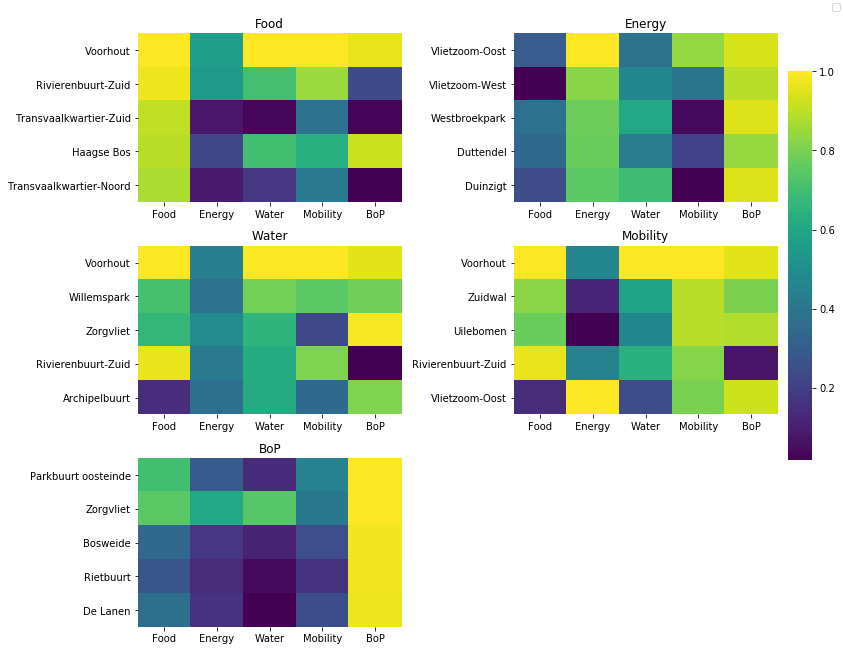

In [7]:
fig, axn = plt.subplots(3, 2,figsize=(11,9))
cbar_ax = fig.add_axes([1, .3, .03, .6])
df = [lci_norm_food,lci_norm_energy,lci_norm_water,lci_norm_mobility,lci_norm_BoP,lci_norm_food]
j = 0
fig.delaxes(axn[2,1])
for i, ax in enumerate(axn.flat):
    sns.heatmap(df[j].head(), ax=ax,
                cbar=i == 0,cmap='viridis',
                cbar_ax=None if i else cbar_ax)
    j = j + 1
axn[0,0].set_title('Food')
axn[0,1].set_title('Energy')
axn[1,0].set_title('Water')
axn[1,1].set_title('Mobility')
axn[2,0].set_title('BoP')
axn[0,0].set_ylabel('')
axn[0,1].set_ylabel('')
axn[1,0].set_ylabel('')
axn[1,1].set_ylabel('')
axn[2,0].set_ylabel('')
fig.tight_layout()
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('heatmap.png',bbox_inches="tight")

In [39]:
resources = ['Food','Energy','Water','Mobility','BoP','Waste per capita']
GWP = []
lci_net = 0
pop = 0
for j in resources:
    for i in range (0,len(lci)):
        lci_net = lci_net + (lci.loc[i,j])*(lci.loc[i,'Population'])
        pop = pop + lci.loc[i,'Population']
    GWP.append(lci_net/pop)
    lci_net = 0
    pop = 0

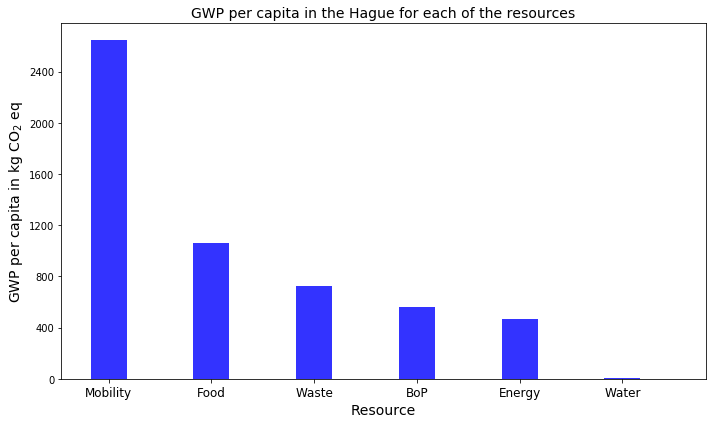

In [40]:
n_groups = 6
resources = ['Mobility','Food','Waste','BoP','Energy','Water']
GWP_percentage = GWP/sum(GWP)
GWP.sort(reverse=True)
# create plot
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,GWP, bar_width,
alpha=opacity,
color='b',
label='GWP per capita')
plt.xlabel('Resource',fontsize=14)
plt.ylabel(r'GWP per capita in kg CO$_{2}$ eq',fontsize=14)
plt.title('GWP per capita in the Hague for each of the resources',fontsize=14)
plt.xticks(index,resources,fontsize=12)
plt.yticks(np.arange(-400, 2800, step=400))
#plt.ylim(-500,2600)


#ax2 = ax.twinx()

#ax2.set_ylabel('Fraction of Total GWP per capita', color='black',fontsize=14)  # we already handled the x-label with ax1
#ax2.bar(index+bar_width,GWP_percentage,bar_width, color='g',label='GWP contribution as a fraction of total GWP per capita')
#ax2.tick_params(axis='y', labelcolor='black')

rects2 = plt.bar(index + bar_width,GWP_percentage, bar_width,
alpha=opacity,
color='b',
label='GWP contribution as a fraction of total GWP per capita')

#plt.legend()
plt.tight_layout()
#ax.set_facecolor('lightgray')
plt.show()

In [20]:
lci.head()

,Name,Population,Household_size,Food,Energy,Water,Mobility,BoP,Waste per capita,Total per capita,Food_normalized,Energy_normalized,Water_normalized,Mobility_normalized,BoP_normalized,Waste per capita_normalized,Total per capita_normalized
0,Archipelbuurt,6100,1.8,1037.501557,644.616755,7.424707,2659.446920,639.624384,-278.415781,4710.198542,0.335018,0.510364,0.702848,0.494077,0.923448,0.724212,0.565984
1,Arendsdorp,1305,2.3,1018.181711,615.397634,5.636770,2445.778264,630.491471,-259.325939,4456.159911,0.091696,0.467119,0.310259,0.117068,0.880940,0.822271,0.350964
2,Belgisch Park,8205,1.9,1056.781010,600.645047,6.364744,2575.489251,634.573690,-274.328277,4599.525465,0.577831,0.445285,0.470105,0.345937,0.899940,0.745209,0.472310
3,Bezuidenhout-Midden,4285,1.9,1038.487410,588.776284,6.816836,2708.849828,622.957625,-263.882158,4702.005825,0.347434,0.427719,0.569373,0.581246,0.845874,0.798867,0.559050
4,Bezuidenhout-Oost,9010,1.7,1049.314747,542.159730,6.992629,2840.196810,635.596806,-293.742042,4780.518679,0.483798,0.358725,0.607973,0.813003,0.904702,0.645486,0.625503


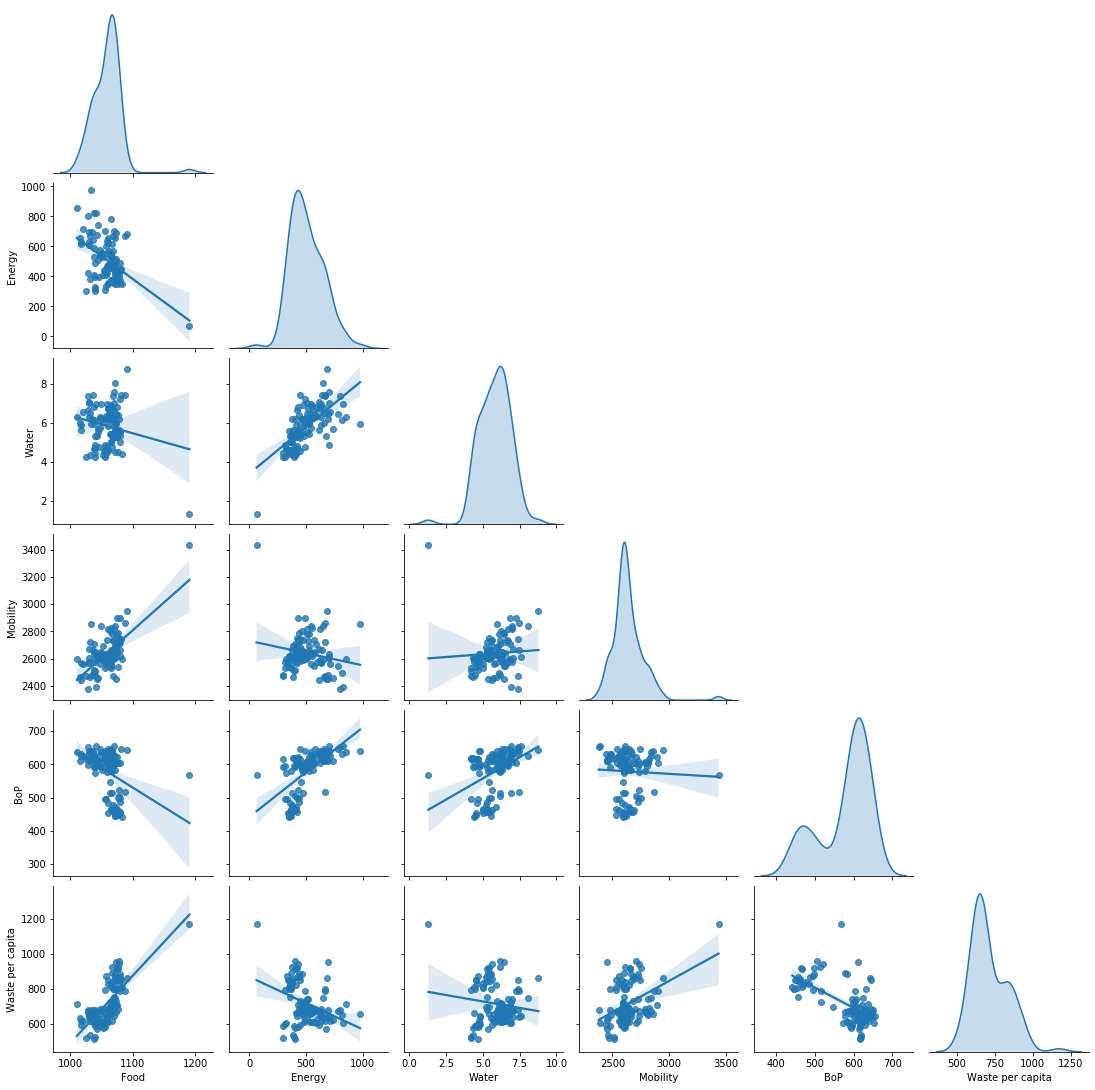

In [41]:
#lci = pd.read_csv('lci_data.csv')
#lci = lci[lci['Name'] != 'Binckhorst']
lci_sectors = lci[['Food','Energy','Water','Mobility','BoP','Waste per capita']]
fig1= sns.pairplot(lci_sectors,corner=True,diag_kind='kde',kind='reg')
#fig1.savefig("pairplot.png")

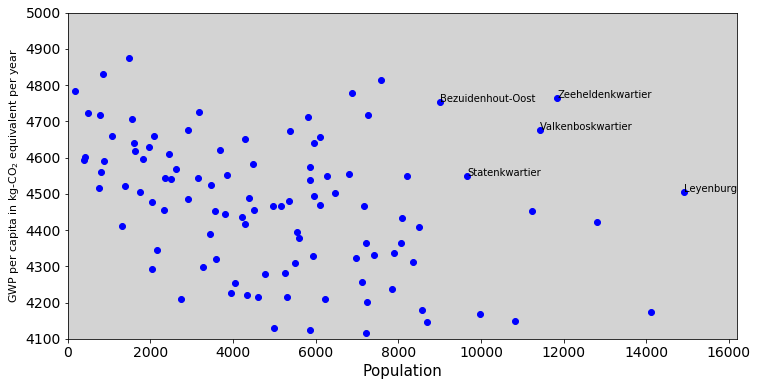

In [72]:
lci['Total GWP per capita'] = lci['Food'] + lci['Energy'] + lci['Water'] + lci['Mobility'] + lci['BoP']
lci['Anot'] = ''
for i in range (0,len(lci)):
    if (lci.loc[i,'Total GWP per capita']>4500 and lci.loc[i,'Population']>9000):
#     if (lci.loc[i,'Name']=='Voorhout'):   
            lci.loc[i,'Anot'] = lci.loc[i,'Name']
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(lci['Population'],lci['Total GWP per capita'],color='b')
plt.xlabel('Population',fontsize=15)
plt.ylabel(r'GWP per capita in kg-CO$_2$ equivalent per year',fontsize=11)
plt.ylim(4100,5000)
plt.xlim(0,16200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')
for i, txt in enumerate(lci['Anot'].tolist()):
    ax.annotate(txt, (lci['Population'].tolist()[i],lci['Total GWP per capita'].tolist()[i]))

In [66]:
lci.to_csv('lci.csv',index=False)

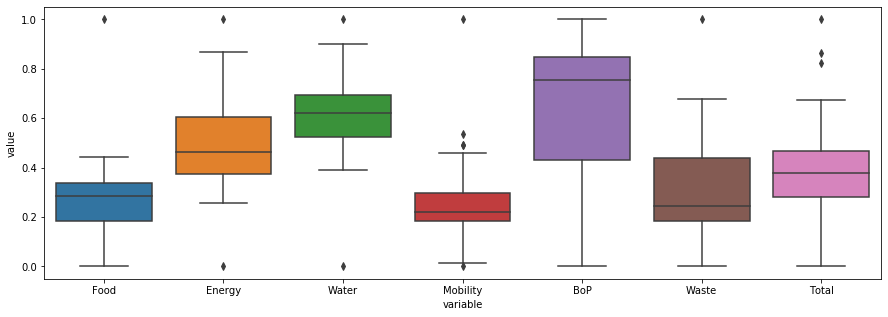

In [50]:
#lci_norm.index = lci['Name']
#lci_norm.head()
plt.figure(figsize=(15,5))
sns.boxplot(x="variable", y="value", data = pd.melt(lci_norm))

<Figure size 1080x360 with 0 Axes>

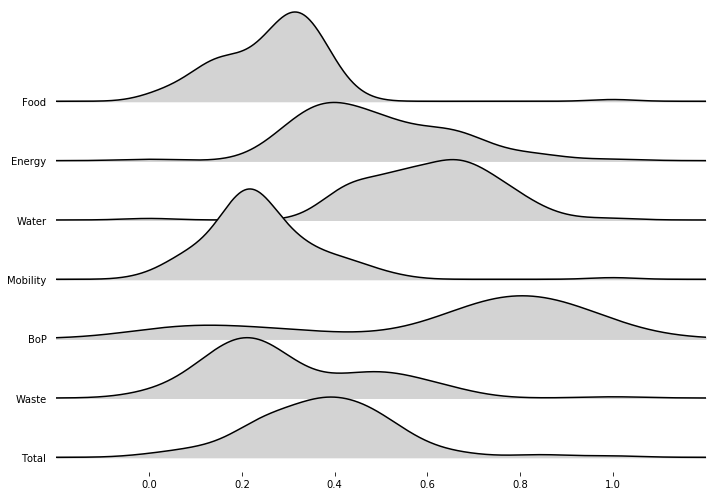

In [51]:
plt.figure(figsize=(15,5))
fig, axes = joypy.joyplot(lci_norm,color='lightgray',figsize=(10,7))